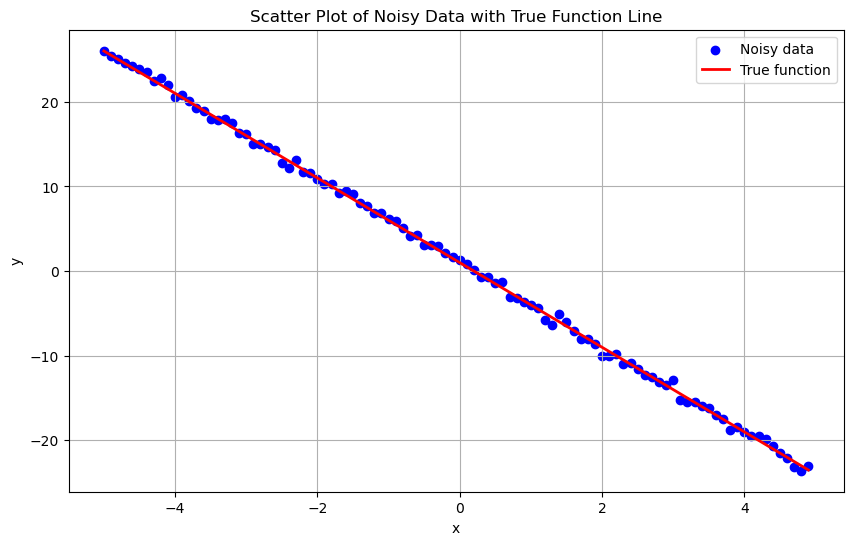

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader


# Creating our dataset class
class Build_Data(Dataset):
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.func = -5 * self.x + 1
        self.y = self.func + 0.4 * torch.randn(self.x.size())
        self.len = self.x.shape[0]

    # Getting the data
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Getting length of the data
    def __len__(self):
        return self.len


# Create dataset object
data_set = Build_Data()

# Convert tensors to numpy arrays
x_np = data_set.x.numpy()
y_np = data_set.y.numpy()

# Plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(x_np, y_np, color='blue', label='Noisy data')
plt.plot(x_np, data_set.func.numpy(), color='red', label='True function', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Noisy Data with True Function Line')
plt.legend()
plt.grid(True)
plt.show()



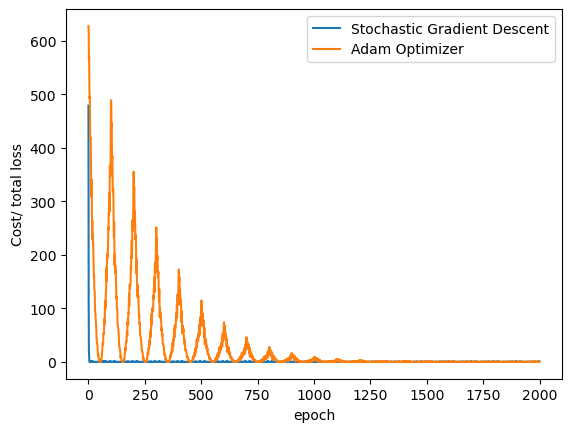

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

# Creating our dataset class
class Build_Data(Dataset):
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.func = -5 * self.x + 1
        self.y = self.func + 0.4 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
    # Getting the data
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    # Getting length of the data
    def __len__(self):
        return self.len

# Create dataset object
data_set = Build_Data()

model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()

# Creating Dataloader object
trainloader = DataLoader(dataset = data_set, batch_size=1)

# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

loss_SGD = []
n_iter = 20

for i in range(n_iter):
    for x, y in trainloader:
        # making a prediction in forward pass
        y_hat = model(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # store loss into list
        loss_SGD.append(loss.item())
        # zeroing gradients after each iteration
        optimizer.zero_grad()
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updating the parameters after each iteration
        optimizer.step()

model = torch.nn.Linear(1, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_Adam = []
for i in range(n_iter):
    for x, y in trainloader:
        # making a prediction in forward pass
        y_hat = model(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # store loss into list
        loss_Adam.append(loss.item())
        # zeroing gradients after each iteration
        optimizer.zero_grad()
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updating the parameters after each iteration
        optimizer.step()

plt.plot(loss_SGD,label = "Stochastic Gradient Descent")
plt.plot(loss_Adam,label = "Adam Optimizer")
plt.xlabel('epoch')
plt.ylabel('Cost/ total loss')
plt.legend()
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.59E-02


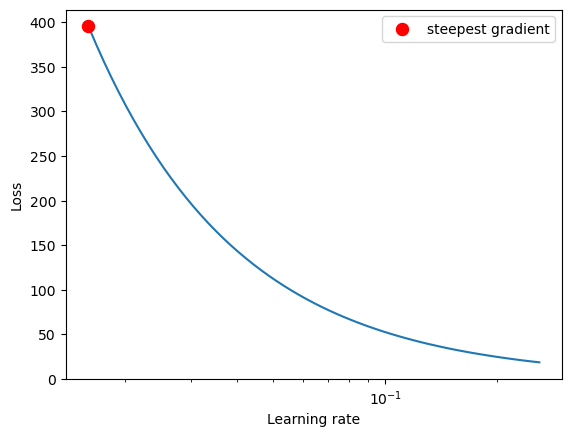

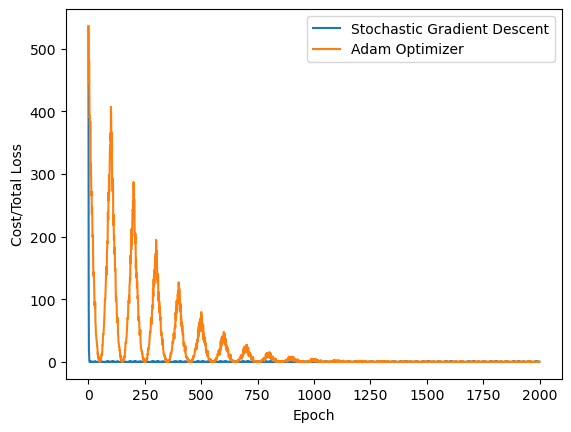

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torch_lr_finder import LRFinder  # Import LRFinder

# Creating our dataset class
class Build_Data(Dataset):
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.func = -5 * self.x + 1
        self.y = self.func + 0.4 * torch.randn(self.x.size())
        self.len = self.x.shape[0]

    # Getting the data
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Getting length of the data
    def __len__(self):
        return self.len

# Create dataset object
data_set = Build_Data()

# Define model, criterion, and dataloader
model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()

# Creating Dataloader object
trainloader = DataLoader(dataset=data_set, batch_size=1)

# Define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Using LRFinder to find optimal learning rate
lr_finder = LRFinder(model, optimizer, criterion, device="cpu")  # Use "cuda" if using GPU

# Run the learning rate finder over a range of learning rates
lr_finder.range_test(trainloader, end_lr=1, num_iter=100)

# Plot the learning rate vs. loss graph
lr_finder.plot()  # Inspect the plot to find the optimal learning rate
lr_finder.reset()  # Reset the model and optimizer to initial state

# Re-define model and optimizer based on the best learning rate
model = torch.nn.Linear(1, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # Choose lr based on plot

# Initialize lists to store losses
loss_SGD = []
n_iter = 20

# Training loop using SGD
for i in range(n_iter):
    for x, y in trainloader:
        # Making a prediction in forward pass
        y_hat = model(x)
        # Calculating the loss
        loss = criterion(y_hat, y)
        # Store loss
        loss_SGD.append(loss.item())
        # Zeroing gradients
        optimizer.zero_grad()
        # Backward pass
        loss.backward()
        # Update parameters
        optimizer.step()

# Re-define model and optimizer for Adam
model = torch.nn.Linear(1, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_Adam = []

# Training loop using Adam
for i in range(n_iter):
    for x, y in trainloader:
        # Making a prediction in forward pass
        y_hat = model(x)
        # Calculating the loss
        loss = criterion(y_hat, y)
        # Store loss
        loss_Adam.append(loss.item())
        # Zeroing gradients
        optimizer.zero_grad()
        # Backward pass
        loss.backward()
        # Update parameters
        optimizer.step()

# Plot losses for both optimizers
plt.plot(loss_SGD, label="Stochastic Gradient Descent")
plt.plot(loss_Adam, label="Adam Optimizer")
plt.xlabel('Epoch')
plt.ylabel('Cost/Total Loss')
plt.legend()
plt.show()
